<a href="https://colab.research.google.com/github/LuisFernandoCampos/analisis_cohortes/blob/version2/Analis%C3%ADs_de_cohortes_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_excel("/content/KPMG.xlsx", sheet_name = "Transactions")

In [91]:
df.head(3)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701


In [92]:
# Remplazamos el nombre de nuestras columnas por la primera fila
df.columns=df.iloc[0]

# Seleccionamos a partir de la primera fila en adelante
df=df.loc[1:]

In [93]:
df.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361


In [95]:
df["order_status"].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [96]:
# Seleccionamos solo los pedidos aprovados (order_status=Approved)
df=df[df["order_status"] == "Approved"]

In [97]:
# Seleccionamos las columnas "customer_id" y "transaction_date"
df=df[["customer_id","transaction_date"]]

In [98]:
# Convertir la columna "transaction_date" a objetos de fecha
df["transaction_date"] = pd.to_datetime(df["transaction_date"], format="%Y-%m-%d")

# Obtener el mes
df["month"] = df["transaction_date"].dt.strftime("%m")

# Obtener el mes y el año
df["month_year"] = df["transaction_date"].dt.strftime("%m-%y")

In [99]:
df.head(3)

,customer_id,transaction_date,month,month_year
1,2950,2017-02-25,02,02-17
2,3120,2017-05-21,05,05-17
3,402,2017-10-16,10,10-17


In [100]:
df["month"]=df["month"].astype(int)

In [101]:
df.shape

(19821, 4)

In [102]:
df["customer_id"].nunique()

3493

In [103]:
df["customer_id"].value_counts()

2476    14
2183    14
1068    14
1302    13
2912    13
        ..
1757     1
71       1
1865     1
2417     1
1544     1
Name: customer_id, Length: 3493, dtype: int64

In [104]:
# A nivel de cliente encontramos el mes en el que realizaron su primera transacción, estableciendo así su mes de inicio (cohort_month)
df_customer = df.groupby("customer_id").agg({"month": "min","month_year": "min"}).reset_index()


# Renombramos la columna "transaction_index"
df_customer = df_customer.rename(columns={"month":"cohort_month", "month_year":"cohort_month_2"})
df_customer

,customer_id,cohort_month,cohort_month_2
0,1,1,01-17
1,2,5,05-17
2,3,2,02-17
3,4,4,04-17
4,5,3,03-17
...,...,...,...
3488,3497,9,09-17
3489,3498,2,02-17
3490,3499,1,01-17
3491,3500,1,01-17


In [105]:
df_mer=df.merge(df_customer)
df_mer

,customer_id,transaction_date,month,month_year,cohort_month,cohort_month_2
0,2950,2017-02-25,2,02-17,2,02-17
1,2950,2017-10-16,10,10-17,2,02-17
2,2950,2017-04-26,4,04-17,2,02-17
3,3120,2017-05-21,5,05-17,1,01-17
4,3120,2017-10-05,10,10-17,1,01-17
...,...,...,...,...,...,...
19816,2200,2017-10-12,10,10-17,4,04-17
19817,2789,2017-12-06,12,12-17,6,06-17
19818,2789,2017-06-20,6,06-17,6,06-17
19819,3446,2017-12-26,12,12-17,12,12-17


In [106]:
df_mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19820
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       19821 non-null  object        
 1   transaction_date  19821 non-null  datetime64[ns]
 2   month             19821 non-null  int64         
 3   month_year        19821 non-null  object        
 4   cohort_month      19821 non-null  int64         
 5   cohort_month_2    19821 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.1+ MB


In [107]:
# customer_id = 2200
df_mer[df_mer["customer_id"]== 2200]

,customer_id,transaction_date,month,month_year,cohort_month,cohort_month_2
19815,2200,2017-04-20,4,04-17,4,04-17
19816,2200,2017-10-12,10,10-17,4,04-17


In [108]:
# customer_id = 2950
df_mer[df_mer["customer_id"]== 2950]

,customer_id,transaction_date,month,month_year,cohort_month,cohort_month_2
0,2950,2017-02-25,2,02-17,2,02-17
1,2950,2017-10-16,10,10-17,2,02-17
2,2950,2017-04-26,4,04-17,2,02-17


In [109]:
# Creamos una nueva columna que representa el número de meses transcurridos desde su primera transaccion
df_mer['cohort_index']=df_mer.month - df_mer.cohort_month
df_mer.head(2)

,customer_id,transaction_date,month,month_year,cohort_month,cohort_month_2,cohort_index
0,2950,2017-02-25,2,02-17,2,02-17,0
1,2950,2017-10-16,10,10-17,2,02-17,8


In [110]:
# Para customer_id = 10:
# Se aprecia que la primera transaccion fue en junio y cohort_index calcula los meses transcurridos a partir de esa primera transaccion
df_mer[df_mer["customer_id"] == 10]

,customer_id,transaction_date,month,month_year,cohort_month,cohort_month_2,cohort_index
15631,10,2017-08-26,8,08-17,6,06-17,2
15632,10,2017-06-20,6,06-17,6,06-17,0
15633,10,2017-07-13,7,07-17,6,06-17,1
15634,10,2017-08-09,8,08-17,6,06-17,2
15635,10,2017-11-27,11,11-17,6,06-17,5
15636,10,2017-11-17,11,11-17,6,06-17,5


In [112]:
df_mer= df_mer[["customer_id","cohort_month_2","cohort_index"]]
df_mer.head(3)

,customer_id,cohort_month_2,cohort_index
0,2950,02-17,0
1,2950,02-17,8
2,2950,02-17,2


In [113]:
df_mer=df_mer.drop_duplicates()

In [114]:
df_cohort = df_mer.groupby(['cohort_month_2','cohort_index'])['customer_id'].count().reset_index()
df_cohort = df_cohort.rename(columns={'customer_id':'customer_count'})
df_cohort

,cohort_month_2,cohort_index,customer_count
0,01-17,0,1347
1,01-17,1,483
2,01-17,2,505
3,01-17,3,499
4,01-17,4,492
...,...,...,...
73,10-17,1,6
74,10-17,2,8
75,11-17,0,13
76,11-17,1,5


In [115]:
df_final = df_cohort.pivot_table(index = 'cohort_month_2', columns = 'cohort_index',values = 'customer_count')
df_final

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month_2,,,,,,,,,,,,
01-17,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
02-17,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
03-17,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
04-17,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
05-17,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
06-17,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
07-17,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
08-17,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-17,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# Pasamos los valores a porcentajes
df_porc=df_final.divide(df_final.loc[:,0], axis=0).mul(100).round(1)
df_porc

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month_2,,,,,,,,,,,,
01-17,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
02-17,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
03-17,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
04-17,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
05-17,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
06-17,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
07-17,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
08-17,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-17,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


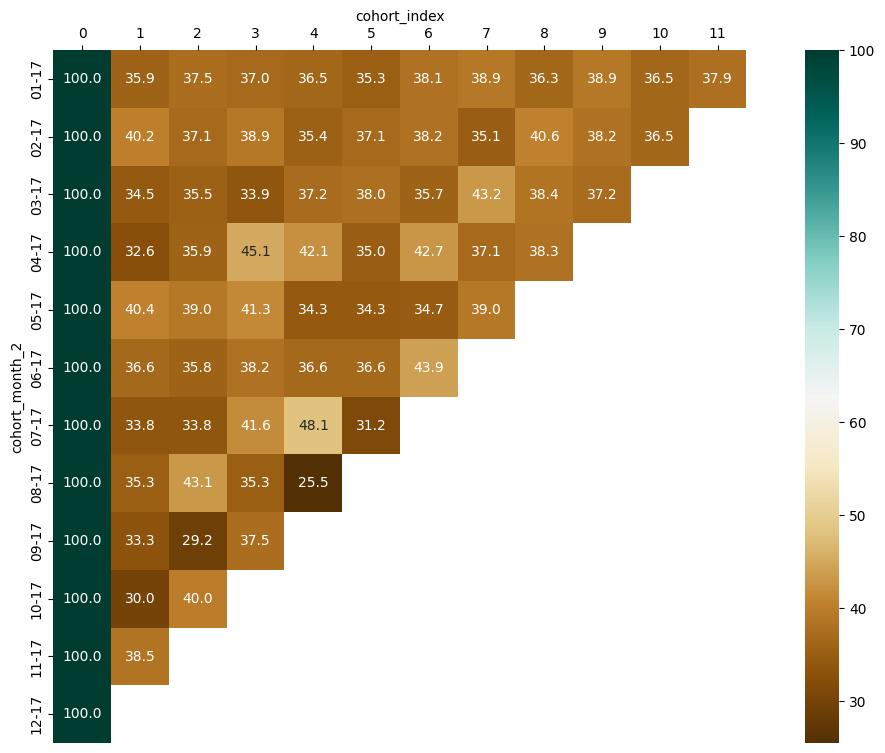

In [117]:
plt.figure(figsize=(15, 9))
ax=sns.heatmap(df_porc,cmap="BrBG",annot=True,fmt=".1f",square=True)  #YlGnBu

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')